In [22]:
%matplotlib inline

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [24]:
df = pd.read_csv("Weather_station_combined.csv")
df.drop(columns="Unnamed: 0", inplace=True)
df.insert(1, 'month', df['day'].apply(lambda x: x[5:7]))
df

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S109,01,2017-01-01,00:00,26.0,90.6,0.0,2.1,24,Ang Mo Kio Avenue 5,103.84920,1.37640
1,S117,01,2017-01-01,00:00,26.9,82.1,0.0,2.2,347,Banyan Road,103.67900,1.25600
2,S107,01,2017-01-01,00:00,27.0,89.8,0.0,1.3,2,East Coast Parkway,103.96250,1.31350
3,S43,01,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,Kim Chuan Road,103.88780,1.33990
4,S108,01,2017-01-01,00:00,27.0,87.3,0.0,11.5,356,Marina Gardens Drive,103.87030,1.27990
...,...,...,...,...,...,...,...,...,...,...,...,...
486726,S122,07,2021-07-21,23:00,29.2,78.6,0.0,2.6,172,Sembawang Road,103.82490,1.41731
486727,S115,07,2021-07-21,23:00,29.5,75.3,0.0,4.3,61,Tuas South Avenue 3,103.61843,1.29377
486728,S24,07,2021-07-21,23:00,29.1,73.8,0.0,8.3,176,Upper Changi Road North,103.98260,1.36780
486729,S116,07,2021-07-21,23:00,29.3,86.7,0.0,6.3,153,West Coast Highway,103.75400,1.28100


In [25]:
df_para = df[["air_temp", "rel_humidity", "rainfall", "windspeed", "winddir"]]
#df_para.head()

In [26]:
df_para.describe()

,air_temp,rel_humidity,rainfall,windspeed,winddir
count,486731.000000,486731.000000,486731.000000,486731.000000,486731.000000
mean,28.190119,79.493747,0.017505,4.945247,152.061443
std,2.062776,11.419369,0.221900,3.491800,111.570289
min,19.100000,29.500000,0.000000,0.000000,1.000000
25%,26.700000,72.200000,0.000000,2.500000,47.000000
50%,28.100000,81.200000,0.000000,4.300000,137.000000
75%,29.600000,87.900000,0.000000,6.500000,244.000000
max,35.900000,101.000000,12.600000,50.000000,359.000000


In [27]:
df_para.corr()

,air_temp,rel_humidity,rainfall,windspeed,winddir
air_temp,1.000000,-0.831098,-0.108698,0.161878,0.001320
rel_humidity,-0.831098,1.000000,0.089399,-0.162558,0.037593
rainfall,-0.108698,0.089399,1.000000,0.033695,0.028093
windspeed,0.161878,-0.162558,0.033695,1.000000,-0.107108
winddir,0.001320,0.037593,0.028093,-0.107108,1.000000


## Sort and check for outliers at low temp

In [28]:
df_sorttemp = df.sort_values(by=['air_temp'], ignore_index=True)
df_sorttemp.head(15)

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S60,11,2017-11-08,06:00,19.1,94.8,0.0,7.00000,277,Sentosa,103.82790,1.25000
1,S60,11,2017-11-08,07:00,19.5,98.0,1.4,11.30000,199,Sentosa,103.82790,1.25000
2,S60,11,2017-11-08,09:00,20.7,85.6,0.0,9.50000,243,Sentosa,103.82790,1.25000
3,S60,11,2017-11-06,03:00,20.8,99.0,0.4,3.50000,233,Sentosa,103.82790,1.25000
4,S122,09,2020-09-16,05:00,21.0,59.8,0.2,1.60000,306,Sembawang Road,103.82490,1.41731
5,S107,08,2019-08-15,05:00,21.1,84.8,0.0,7.50000,128,East Coast Parkway,103.96250,1.31350
6,S50,07,2018-07-15,05:00,21.2,98.8,0.6,5.80000,322,Clementi Road,103.77680,1.33370
7,S104,01,2018-01-14,05:00,21.3,96.9,0.0,9.10001,6,Woodlands Avenue 9,103.78538,1.44387
8,S44,08,2018-08-08,01:00,21.3,97.1,0.0,11.60000,302,Nanyang Avenue,103.68166,1.34583
9,S24,01,2018-01-14,05:00,21.4,96.4,0.2,5.60000,315,Upper Changi Road North,103.98260,1.36780


Text(0.5, 1.0, 'air_temp - sorted asc 150 rows')

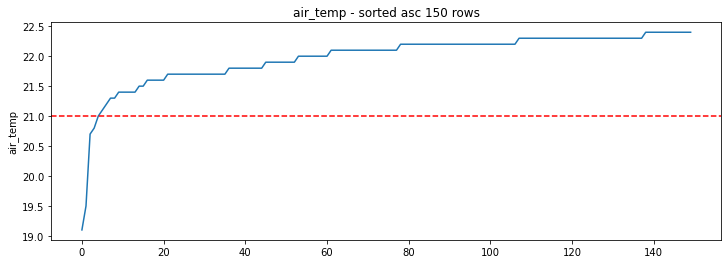

In [29]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_sorttemp["air_temp"][:150])
plt.axhline(21, c="red", linestyle= "dashed")
plt.title("air_temp - sorted asc 150 rows")

Text(0.5, 1.0, 'air_temp - sorted asc 150 rows')

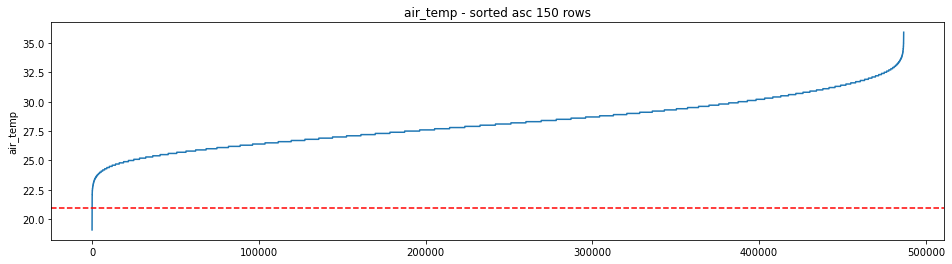

In [30]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df_sorttemp["air_temp"])
plt.axhline(21, c="red", linestyle= "dashed")
plt.title("air_temp - sorted asc 150 rows")

Text(0.5, 1.0, 'All stations by month')

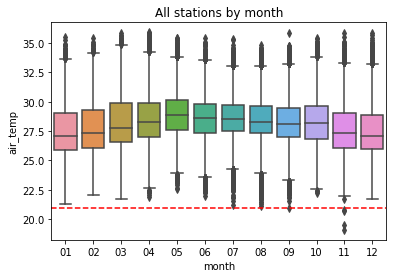

In [31]:
sns.boxplot(data=df, x='month', y='air_temp')
plt.axhline(21, c="red", linestyle= "dashed")
plt.title("All stations by month")

#### Check S60 (2017-11-08)

In [32]:
df_20171108 =  df.loc[df["day"]=="2017-11-08"].reset_index()
df_20171108.drop(columns="index", inplace= True)
df_20171108.head()

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S109,11,2017-11-08,00:00,25.6,96.2,0.0,2.10000,29,Ang Mo Kio Avenue 5,103.8492,1.3764
1,S50,11,2017-11-08,00:00,25.9,91.4,0.0,3.70000,54,Clementi Road,103.7768,1.3337
2,S107,11,2017-11-08,00:00,27.2,92.2,0.0,3.50000,354,East Coast Parkway,103.9625,1.3135
3,S43,11,2017-11-08,00:00,26.8,89.4,0.0,1.50000,194,Kim Chuan Road,103.8878,1.3399
4,S102,11,2017-11-08,00:00,27.8,86.9,0.0,8.39999,1,Semakau Landfill,103.7680,1.1890


In [33]:
df_20171108_S60 =  df_20171108.loc[df_20171108["station_id"]=="S60"].reset_index()
df_20171108_S60.drop(columns="index", inplace= True)
df_20171108_S60

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S60,11,2017-11-08,00:00,25.1,86.3,0.0,1.9,20,Sentosa,103.8279,1.25
1,S60,11,2017-11-08,01:00,25.0,86.9,0.0,2.5,77,Sentosa,103.8279,1.25
2,S60,11,2017-11-08,02:00,24.9,88.2,0.0,2.5,64,Sentosa,103.8279,1.25
3,S60,11,2017-11-08,03:00,24.9,89.1,0.0,2.1,44,Sentosa,103.8279,1.25
4,S60,11,2017-11-08,04:00,24.5,91.2,0.0,2.9,306,Sentosa,103.8279,1.25
5,S60,11,2017-11-08,06:00,19.1,94.8,0.0,7.0,277,Sentosa,103.8279,1.25
6,S60,11,2017-11-08,07:00,19.5,98.0,1.4,11.3,199,Sentosa,103.8279,1.25
7,S60,11,2017-11-08,09:00,20.7,85.6,0.0,9.5,243,Sentosa,103.8279,1.25


In [34]:
df_20171108_matchtime = df_20171108.drop(df_20171108[df_20171108["time"]=="05:00"].index)
df_20171108_matchtime = df_20171108_matchtime.drop(df_20171108_matchtime[df_20171108_matchtime["time"]=="08:00"].index)

Text(0.5, 1.0, 'Temp for S60 (2017-11-08) vs other stations')

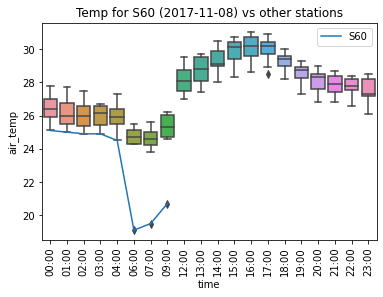

In [35]:
sns.boxplot(x="time", y="air_temp", data=df_20171108_matchtime)
sns.lineplot(x="time", y="air_temp", data=df_20171108_S60, label = "S60")
plt.xticks(rotation=90)
plt.ylabel("air_temp")
plt.title("Temp for S60 (2017-11-08) vs other stations")

#### Check S60 (2017-11-06)

In [36]:
df_20171106 =  df.loc[df["day"]=="2017-11-06"].reset_index()
df_20171106.drop(columns="index", inplace= True)
df_20171106.head()

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S109,11,2017-11-06,00:00,26.7,86.6,0.0,5.1,42,Ang Mo Kio Avenue 5,103.8492,1.3764
1,S107,11,2017-11-06,00:00,27.6,82.9,0.0,5.6,331,East Coast Parkway,103.9625,1.3135
2,S43,11,2017-11-06,00:00,27.4,85.2,0.0,6.2,101,Kim Chuan Road,103.8878,1.3399
3,S102,11,2017-11-06,00:00,28.8,87.1,0.0,9.3,94,Semakau Landfill,103.7680,1.1890
4,S60,11,2017-11-06,00:00,27.5,83.8,0.0,8.5,100,Sentosa,103.8279,1.2500


In [37]:
df_20171106_S60 =  df_20171106.loc[df_20171106["station_id"]=="S60"].reset_index()
df_20171106_S60.drop(columns="index", inplace= True)
df_20171106_S60

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S60,11,2017-11-06,00:00,27.5,83.8,0.0,8.5,100,Sentosa,103.8279,1.25
1,S60,11,2017-11-06,01:00,27.0,82.8,0.0,3.7,97,Sentosa,103.8279,1.25
2,S60,11,2017-11-06,02:00,22.9,98.7,0.6,2.5,336,Sentosa,103.8279,1.25
3,S60,11,2017-11-06,03:00,20.8,99.0,0.4,3.5,233,Sentosa,103.8279,1.25
4,S60,11,2017-11-06,04:00,22.9,98.2,0.2,2.5,301,Sentosa,103.8279,1.25
5,S60,11,2017-11-06,05:00,23.1,98.7,0.4,1.0,115,Sentosa,103.8279,1.25
6,S60,11,2017-11-06,06:00,23.0,97.4,0.0,3.3,129,Sentosa,103.8279,1.25
7,S60,11,2017-11-06,07:00,22.7,96.1,0.0,1.2,10,Sentosa,103.8279,1.25
8,S60,11,2017-11-06,09:00,22.7,92.7,0.0,2.5,52,Sentosa,103.8279,1.25
9,S60,11,2017-11-06,10:00,24.3,86.5,0.0,3.1,77,Sentosa,103.8279,1.25


In [38]:
df_20171106_matchtime = df_20171106.drop(df_20171106[df_20171106["time"]=="08:00"].index)

Text(0.5, 1.0, 'Temp for S60 (2017-11-06) vs other stations')

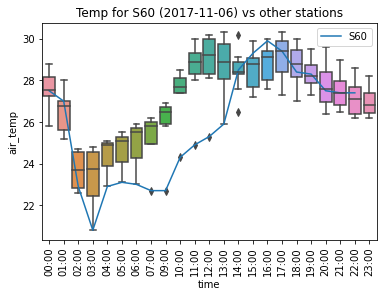

In [39]:
sns.boxplot(x="time", y="air_temp", data=df_20171106_matchtime)
sns.lineplot(x="time", y="air_temp", data=df_20171106_S60, label = "S60")
plt.xticks(rotation=90)
plt.ylabel("air_temp")
plt.title("Temp for S60 (2017-11-06) vs other stations")

#### Check S122 (2020-09-16)

In [40]:
df_20200916 =  df.loc[df["day"]=="2020-09-16"].reset_index()
df_20200916.drop(columns="index", inplace= True)
df_20200916.head()

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S109,09,2020-09-16,00:00,27.9,77.4,0.0,7.4,43,Ang Mo Kio Avenue 5,103.8492,1.3764
1,S117,09,2020-09-16,00:00,28.1,85.9,0.0,6.7,110,Banyan Road,103.6790,1.2560
2,S50,09,2020-09-16,00:00,27.6,83.9,0.0,6.0,59,Clementi Road,103.7768,1.3337
3,S107,09,2020-09-16,00:00,28.6,76.7,0.0,6.9,100,East Coast Parkway,103.9625,1.3135
4,S43,09,2020-09-16,00:00,28.0,84.7,0.0,4.5,318,Kim Chuan Road,103.8878,1.3399


In [41]:
df_20200916_S122 =  df_20200916.loc[df_20200916["station_id"]=="S122"].reset_index()
df_20200916_S122.drop(columns="index", inplace= True)
df_20200916_S122

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S122,09,2020-09-16,05:00,21.0,59.8,0.2,1.6,306,Sembawang Road,103.8249,1.41731


In [42]:
df_temp = pd.read_csv("air_temp.csv")
df_temp['day']= df_temp['timestamp'].apply(lambda x: x[:10])
df_temp['time']= df_temp['timestamp'].apply(lambda x: x[11:15]+"0")
df_temp.drop(columns="Unnamed: 0", inplace= True)
df_temp

,timestamp,station_id,air-temperature,day,time
0,2017-01-01T00:01:59+08:00,S109,26.0,2017-01-01,00:00
1,2017-01-01T00:01:59+08:00,S117,26.9,2017-01-01,00:00
2,2017-01-01T00:01:59+08:00,S107,27.0,2017-01-01,00:00
3,2017-01-01T00:01:59+08:00,S43,26.9,2017-01-01,00:00
4,2017-01-01T00:01:59+08:00,S108,27.0,2017-01-01,00:00
...,...,...,...,...,...
633780,2021-07-21T23:01:00+08:00,S122,29.2,2021-07-21,23:00
633781,2021-07-21T23:01:00+08:00,S115,29.5,2021-07-21,23:00
633782,2021-07-21T23:01:00+08:00,S24,29.1,2021-07-21,23:00
633783,2021-07-21T23:01:00+08:00,S116,29.3,2021-07-21,23:00


In [43]:
df_20200916a =  df_temp.loc[df_temp["day"]=="2020-09-16"].reset_index()
df_20200916a.drop(columns="index", inplace= True)
df_20200916a.head()

,timestamp,station_id,air-temperature,day,time
0,2020-09-16T00:01:00+08:00,S109,27.9,2020-09-16,00:00
1,2020-09-16T00:01:00+08:00,S117,28.1,2020-09-16,00:00
2,2020-09-16T00:01:00+08:00,S50,27.6,2020-09-16,00:00
3,2020-09-16T00:01:00+08:00,S107,28.6,2020-09-16,00:00
4,2020-09-16T00:01:00+08:00,S43,28.0,2020-09-16,00:00


In [44]:
df_20200916_S122a =  df_20200916a.loc[df_20200916a["station_id"]=="S122"].reset_index()
df_20200916_S122a.drop(columns="index", inplace= True)
df_20200916_S122a

,timestamp,station_id,air-temperature,day,time
0,2020-09-16T00:01:00+08:00,S122,25.8,2020-09-16,00:00
1,2020-09-16T01:01:00+08:00,S122,25.7,2020-09-16,01:00
2,2020-09-16T02:01:00+08:00,S122,25.4,2020-09-16,02:00
3,2020-09-16T03:01:00+08:00,S122,22.9,2020-09-16,03:00
4,2020-09-16T05:01:00+08:00,S122,21.0,2020-09-16,05:00
5,2020-09-16T06:01:00+08:00,S122,21.6,2020-09-16,06:00
6,2020-09-16T07:01:00+08:00,S122,21.7,2020-09-16,07:00
7,2020-09-16T11:01:00+08:00,S122,27.3,2020-09-16,11:00
8,2020-09-16T15:01:00+08:00,S122,29.4,2020-09-16,15:00
9,2020-09-16T18:01:00+08:00,S122,27.2,2020-09-16,18:00


In [45]:
df_20200916_matchtime = df_20200916a.drop(df_20200916[df_20200916["time"]=="04:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="08:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="09:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="10:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="12:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="13:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="14:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="16:00"].index)
df_20200916_matchtime = df_20200916_matchtime.drop(df_20200916_matchtime[df_20200916_matchtime["time"]=="17:00"].index)

Text(0.5, 1.0, 'Temp for S122 (2020-09-16) vs other stations')

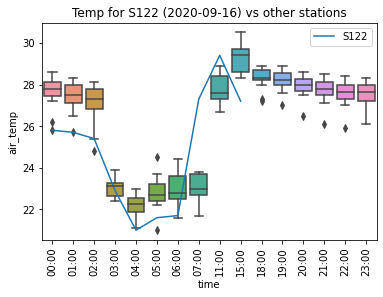

In [46]:
sns.boxplot(x="time", y="air-temperature", data=df_20200916_matchtime)
sns.lineplot(x="time", y="air-temperature", data=df_20200916_S122a, label = "S122")
plt.xticks(rotation=90)
plt.ylabel("air_temp")
plt.title("Temp for S122 (2020-09-16) vs other stations")

#### Check S107 (2019-08-15)

In [47]:
df_20190815 =  df.loc[df["day"]=="2019-08-15"].reset_index()
df_20190815.drop(columns="index", inplace= True)
df_20190815

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S109,08,2019-08-15,00:00,28.4,81.0,0.0,6.1,58,Ang Mo Kio Avenue 5,103.84920,1.37640
1,S117,08,2019-08-15,00:00,28.5,85.4,0.0,6.1,101,Banyan Road,103.67900,1.25600
2,S50,08,2019-08-15,00:00,28.0,81.8,0.0,5.8,130,Clementi Road,103.77680,1.33370
3,S107,08,2019-08-15,00:00,26.0,83.2,0.0,8.8,126,East Coast Parkway,103.96250,1.31350
4,S43,08,2019-08-15,00:00,28.8,81.2,0.0,4.3,226,Kim Chuan Road,103.88780,1.33990
...,...,...,...,...,...,...,...,...,...,...,...,...
252,S60,08,2019-08-15,23:00,28.1,74.9,0.0,4.1,103,Sentosa,103.82790,1.25000
253,S115,08,2019-08-15,23:00,29.0,77.6,0.0,2.0,191,Tuas South Avenue 3,103.61843,1.29377
254,S24,08,2019-08-15,23:00,28.5,78.2,0.0,8.0,157,Upper Changi Road North,103.98260,1.36780
255,S116,08,2019-08-15,23:00,28.9,80.7,0.0,6.0,142,West Coast Highway,103.75400,1.28100


In [48]:
df_20190815_S107 =  df_20190815.loc[df_20190815["station_id"]=="S107"].reset_index()
df_20190815_S107.drop(columns="index", inplace= True)
df_20190815_S107

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S107,08,2019-08-15,00:00,26.0,83.2,0.0,8.80000,126,East Coast Parkway,103.9625,1.3135
1,S107,08,2019-08-15,01:00,25.3,84.3,0.0,10.80000,125,East Coast Parkway,103.9625,1.3135
2,S107,08,2019-08-15,02:00,23.2,86.0,0.0,10.90000,133,East Coast Parkway,103.9625,1.3135
3,S107,08,2019-08-15,03:00,22.6,87.1,0.0,6.40000,136,East Coast Parkway,103.9625,1.3135
4,S107,08,2019-08-15,04:00,21.7,85.7,0.0,5.50000,135,East Coast Parkway,103.9625,1.3135
5,S107,08,2019-08-15,05:00,21.1,84.8,0.0,7.50000,128,East Coast Parkway,103.9625,1.3135
6,S107,08,2019-08-15,07:00,21.5,85.0,0.0,7.30000,139,East Coast Parkway,103.9625,1.3135
7,S107,08,2019-08-15,08:00,22.9,84.0,0.0,7.50000,123,East Coast Parkway,103.9625,1.3135
8,S107,08,2019-08-15,09:00,22.2,84.7,0.0,8.89999,126,East Coast Parkway,103.9625,1.3135
9,S107,08,2019-08-15,10:00,24.6,81.4,0.0,6.70000,121,East Coast Parkway,103.9625,1.3135


In [49]:
df_20190815_matchtime = df_20190815.drop(df_20190815[df_20190815["time"]=="06:00"].index)

Text(0.5, 1.0, 'Temp for S107 (2018-08-15) vs other stations')

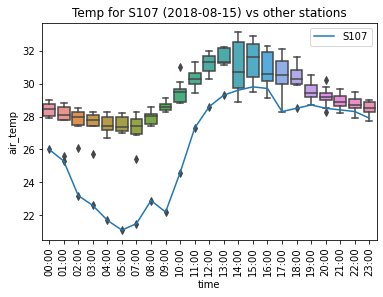

In [50]:
sns.boxplot(x="time", y="air_temp", data=df_20190815_matchtime)
sns.lineplot(x="time", y="air_temp", data=df_20190815_S107, label = "S107")
plt.xticks(rotation=90)
plt.ylabel("air_temp")
plt.title("Temp for S107 (2018-08-15) vs other stations")

In [53]:
df_20190815_S60 = df_20190815.loc[df_20190815["station_id"]=="S60"]
df_20190815_S108 = df_20190815.loc[df_20190815["station_id"]=="S108"]

In [62]:
df_20190815_S60 = df_20190815_S60.drop(df_20190815_S60[df_20190815_S60["time"]=="06:00"].index)

In [66]:
df_20190815_S108 = df_20190815_S108.drop(df_20190815_S108[df_20190815_S108["time"]=="06:00"].index)

In [67]:
df_20190815_S108

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
5,S108,08,2019-08-15,00:00,28.6,82.5,0.0,1.8,126,Marina Gardens Drive,103.8703,1.2799
15,S108,08,2019-08-15,01:00,28.5,83.3,0.0,3.3,133,Marina Gardens Drive,103.8703,1.2799
26,S108,08,2019-08-15,02:00,28.2,86.0,0.0,3.0,141,Marina Gardens Drive,103.8703,1.2799
37,S108,08,2019-08-15,03:00,28.0,86.2,0.0,2.3,138,Marina Gardens Drive,103.8703,1.2799
48,S108,08,2019-08-15,04:00,27.9,85.8,0.0,1.3,129,Marina Gardens Drive,103.8703,1.2799
59,S108,08,2019-08-15,05:00,28.0,86.1,0.0,1.5,115,Marina Gardens Drive,103.8703,1.2799


Text(0.5, 1.0, 'Temp for S107, S60 and S108 (2018-08-15) vs other stations')

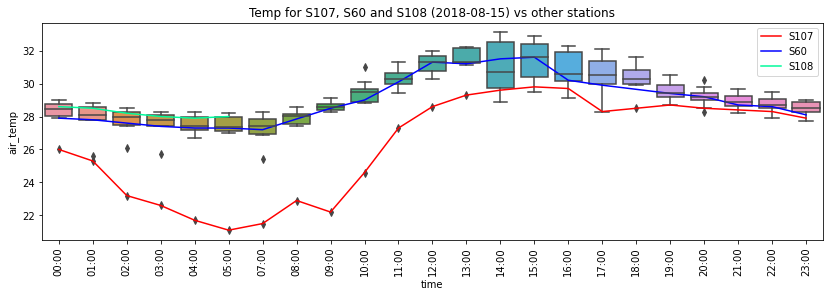

In [68]:
plt.figure(figsize=(14,4))
sns.boxplot(x="time", y="air_temp", data=df_20190815_matchtime)
sns.lineplot(x="time", y="air_temp", data=df_20190815_S107, label = "S107", color="red")
sns.lineplot(x="time", y="air_temp", data=df_20190815_S60, label = "S60", color="blue")
sns.lineplot(x="time", y="air_temp", data=df_20190815_S108, label = "S108", color="mediumspringgreen")
plt.xticks(rotation=90)
plt.ylabel("air_temp")
plt.title("Temp for S107, S60 and S108 (2018-08-15) vs other stations")

In [175]:
df_20190815_matchtime

,station_id,month,day,time,identifier,air_temp,humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S109,08,2019-08-15,00:00,2019-08-15_00:00_S109,28.4,81.0,0.0,6.1,58,Ang Mo Kio Avenue 5,103.84920,1.37640
1,S117,08,2019-08-15,00:00,2019-08-15_00:00_S117,28.5,85.4,0.0,6.1,101,Banyan Road,103.67900,1.25600
2,S50,08,2019-08-15,00:00,2019-08-15_00:00_S50,28.0,81.8,0.0,5.8,130,Clementi Road,103.77680,1.33370
3,S107,08,2019-08-15,00:00,2019-08-15_00:00_S107,26.0,83.2,0.0,8.8,126,East Coast Parkway,103.96250,1.31350
4,S43,08,2019-08-15,00:00,2019-08-15_00:00_S43,28.8,81.2,0.0,4.3,226,Kim Chuan Road,103.88780,1.33990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,S60,08,2019-08-15,23:00,2019-08-15_23:00_S60,28.1,74.9,0.0,4.1,103,Sentosa,103.82790,1.25000
253,S115,08,2019-08-15,23:00,2019-08-15_23:00_S115,29.0,77.6,0.0,2.0,191,Tuas South Avenue 3,103.61843,1.29377
254,S24,08,2019-08-15,23:00,2019-08-15_23:00_S24,28.5,78.2,0.0,8.0,157,Upper Changi Road North,103.98260,1.36780
255,S116,08,2019-08-15,23:00,2019-08-15_23:00_S116,28.9,80.7,0.0,6.0,142,West Coast Highway,103.75400,1.28100


In [176]:
import math
import copy

In [272]:
df_20190815_wind = copy.deepcopy(df_20190815_matchtime).reset_index()
df_20190815_wind

,index,station_id,month,day,time,identifier,air_temp,humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,0,S109,08,2019-08-15,00:00,2019-08-15_00:00_S109,28.4,81.0,0.0,6.1,58,Ang Mo Kio Avenue 5,103.84920,1.37640
1,1,S117,08,2019-08-15,00:00,2019-08-15_00:00_S117,28.5,85.4,0.0,6.1,101,Banyan Road,103.67900,1.25600
2,2,S50,08,2019-08-15,00:00,2019-08-15_00:00_S50,28.0,81.8,0.0,5.8,130,Clementi Road,103.77680,1.33370
3,3,S107,08,2019-08-15,00:00,2019-08-15_00:00_S107,26.0,83.2,0.0,8.8,126,East Coast Parkway,103.96250,1.31350
4,4,S43,08,2019-08-15,00:00,2019-08-15_00:00_S43,28.8,81.2,0.0,4.3,226,Kim Chuan Road,103.88780,1.33990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,252,S60,08,2019-08-15,23:00,2019-08-15_23:00_S60,28.1,74.9,0.0,4.1,103,Sentosa,103.82790,1.25000
244,253,S115,08,2019-08-15,23:00,2019-08-15_23:00_S115,29.0,77.6,0.0,2.0,191,Tuas South Avenue 3,103.61843,1.29377
245,254,S24,08,2019-08-15,23:00,2019-08-15_23:00_S24,28.5,78.2,0.0,8.0,157,Upper Changi Road North,103.98260,1.36780
246,255,S116,08,2019-08-15,23:00,2019-08-15_23:00_S116,28.9,80.7,0.0,6.0,142,West Coast Highway,103.75400,1.28100


In [273]:
df_20190815_wind.drop(columns=['name', 'longitude', 'latitude'], inplace= True)
df_20190815_wind

,index,station_id,month,day,time,identifier,air_temp,humidity,rainfall,windspeed,winddir
0,0,S109,08,2019-08-15,00:00,2019-08-15_00:00_S109,28.4,81.0,0.0,6.1,58
1,1,S117,08,2019-08-15,00:00,2019-08-15_00:00_S117,28.5,85.4,0.0,6.1,101
2,2,S50,08,2019-08-15,00:00,2019-08-15_00:00_S50,28.0,81.8,0.0,5.8,130
3,3,S107,08,2019-08-15,00:00,2019-08-15_00:00_S107,26.0,83.2,0.0,8.8,126
4,4,S43,08,2019-08-15,00:00,2019-08-15_00:00_S43,28.8,81.2,0.0,4.3,226
...,...,...,...,...,...,...,...,...,...,...,...
243,252,S60,08,2019-08-15,23:00,2019-08-15_23:00_S60,28.1,74.9,0.0,4.1,103
244,253,S115,08,2019-08-15,23:00,2019-08-15_23:00_S115,29.0,77.6,0.0,2.0,191
245,254,S24,08,2019-08-15,23:00,2019-08-15_23:00_S24,28.5,78.2,0.0,8.0,157
246,255,S116,08,2019-08-15,23:00,2019-08-15_23:00_S116,28.9,80.7,0.0,6.0,142


In [274]:
df_20190815_wind.drop(columns="index", inplace= True)

In [275]:
df_20190815_wind

,station_id,month,day,time,identifier,air_temp,humidity,rainfall,windspeed,winddir
0,S109,08,2019-08-15,00:00,2019-08-15_00:00_S109,28.4,81.0,0.0,6.1,58
1,S117,08,2019-08-15,00:00,2019-08-15_00:00_S117,28.5,85.4,0.0,6.1,101
2,S50,08,2019-08-15,00:00,2019-08-15_00:00_S50,28.0,81.8,0.0,5.8,130
3,S107,08,2019-08-15,00:00,2019-08-15_00:00_S107,26.0,83.2,0.0,8.8,126
4,S43,08,2019-08-15,00:00,2019-08-15_00:00_S43,28.8,81.2,0.0,4.3,226
...,...,...,...,...,...,...,...,...,...,...
243,S60,08,2019-08-15,23:00,2019-08-15_23:00_S60,28.1,74.9,0.0,4.1,103
244,S115,08,2019-08-15,23:00,2019-08-15_23:00_S115,29.0,77.6,0.0,2.0,191
245,S24,08,2019-08-15,23:00,2019-08-15_23:00_S24,28.5,78.2,0.0,8.0,157
246,S116,08,2019-08-15,23:00,2019-08-15_23:00_S116,28.9,80.7,0.0,6.0,142


In [289]:
df_20190815_wind_S107 = df_20190815_wind.loc[(df_20190815_wind['station_id']=="S107")]
df_20190815_wind_S108 = df_20190815_wind.loc[(df_20190815_wind['station_id']=="S108")]
df_20190815_wind_S60 = df_20190815_wind.loc[(df_20190815_wind['station_id']=="S60")]
df_20190815_wind_compare = pd.concat([df_20190815_wind_S107, df_20190815_wind_S108, df_20190815_wind_S60]).reset_index()

In [291]:
speed_range = max(df_20190815_wind_compare.windspeed) - min(df_20190815_wind_compare.windspeed)
speed_range

14.6

In [292]:
df_20190815_wind_S107['speed_ratio'] = df_20190815_wind_S107['windspeed'].apply(lambda x: x/speed_range)
df_20190815_wind_S108['speed_ratio'] = df_20190815_wind_S108['windspeed'].apply(lambda x: x/speed_range)
df_20190815_wind_S60['speed_ratio'] = df_20190815_wind_S60['windspeed'].apply(lambda x: x/speed_range)

<ipython-input-292-0792bdc60786>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S107['speed_ratio'] = df_20190815_wind_S107['windspeed'].apply(lambda x: x/speed_range)
<ipython-input-292-0792bdc60786>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S108['speed_ratio'] = df_20190815_wind_S108['windspeed'].apply(lambda x: x/speed_range)
<ipython-input-292-0792bdc60786>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [348]:
df_20190815_wind_S107['winddir_rad'] = df_20190815_wind_S107['winddir'].apply(lambda x: math.radians(x-180))
df_20190815_wind_S107["dx"] = df_20190815_wind_S107["winddir_rad"].apply(lambda x: math.sin(x))
df_20190815_wind_S107["dy"] = df_20190815_wind_S107["winddir_rad"].apply(lambda x: math.cos(x))
df_20190815_wind_S107["dxr"] = df_20190815_wind_S107["dx"]*df_20190815_wind_S107["speed_ratio"]
df_20190815_wind_S107["dyr"] = df_20190815_wind_S107["dy"]*df_20190815_wind_S107["speed_ratio"]
df_20190815_wind_S107['xr'] = np.arange(23)
df_20190815_wind_S107

<ipython-input-348-1745537ba052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S107['winddir_rad'] = df_20190815_wind_S107['winddir'].apply(lambda x: math.radians(x-180))
<ipython-input-348-1745537ba052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S107["dx"] = df_20190815_wind_S107["winddir_rad"].apply(lambda x: math.sin(x))
<ipython-input-348-1745537ba052>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,station_id,month,day,time,identifier,air_temp,humidity,rainfall,windspeed,winddir,speed_ratio,winddir_rad,xr,dxr,dyr,dx,dy
3,S107,08,2019-08-15,00:00,2019-08-15_00:00_S107,26.0,83.2,0.0,8.80000,126,0.602740,-0.942478,0,-0.487627,0.354282,-0.809017,0.587785
13,S107,08,2019-08-15,01:00,2019-08-15_01:00_S107,25.3,84.3,0.0,10.80000,125,0.739726,-0.959931,1,-0.605948,0.424289,-0.819152,0.573576
24,S107,08,2019-08-15,02:00,2019-08-15_02:00_S107,23.2,86.0,0.0,10.90000,133,0.746575,-0.820305,2,-0.546011,0.509163,-0.731354,0.681998
35,S107,08,2019-08-15,03:00,2019-08-15_03:00_S107,22.6,87.1,0.0,6.40000,136,0.438356,-0.767945,3,-0.304508,0.315327,-0.694658,0.719340
46,S107,08,2019-08-15,04:00,2019-08-15_04:00_S107,21.7,85.7,0.0,5.50000,135,0.376712,-0.785398,4,-0.266376,0.266376,-0.707107,0.707107
57,S107,08,2019-08-15,05:00,2019-08-15_05:00_S107,21.1,84.8,0.0,7.50000,128,0.513699,-0.907571,5,-0.404800,0.316264,-0.788011,0.615661
67,S107,08,2019-08-15,07:00,2019-08-15_07:00_S107,21.5,85.0,0.0,7.30000,139,0.500000,-0.715585,6,-0.328030,0.377355,-0.656059,0.754710
77,S107,08,2019-08-15,08:00,2019-08-15_08:00_S107,22.9,84.0,0.0,7.50000,123,0.513699,-0.994838,7,-0.430824,0.279780,-0.838671,0.544639
85,S107,08,2019-08-15,09:00,2019-08-15_09:00_S107,22.2,84.7,0.0,8.89999,126,0.609588,-0.942478,8,-0.493167,0.358307,-0.809017,0.587785
95,S107,08,2019-08-15,10:00,2019-08-15_10:00_S107,24.6,81.4,0.0,6.70000,121,0.458904,-1.029744,9,-0.393358,0.236353,-0.857167,0.515038


In [329]:
df_20190815_wind_S108['winddir_rad'] = df_20190815_wind_S108['winddir'].apply(lambda x: math.radians(x-180))
df_20190815_wind_S108["dx"] = df_20190815_wind_S108["winddir_rad"].apply(lambda x: math.sin(x))
df_20190815_wind_S108["dxr"] = df_20190815_wind_S108["dx"]*df_20190815_wind_S108["speed_ratio"]
df_20190815_wind_S108["dy"] = df_20190815_wind_S108["winddir_rad"].apply(lambda x: math.cos(x))
df_20190815_wind_S108["dyr"] = df_20190815_wind_S108["dy"]*df_20190815_wind_S108["speed_ratio"]
df_20190815_wind_S108['xr'] = np.arange(6)
df_20190815_wind_S108

<ipython-input-329-995886d9aca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S108['winddir_rad'] = df_20190815_wind_S108['winddir'].apply(lambda x: math.radians(x-180))
<ipython-input-329-995886d9aca5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S108["dx"] = df_20190815_wind_S108["winddir_rad"].apply(lambda x: math.sin(x))
<ipython-input-329-995886d9aca5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,station_id,month,day,time,identifier,air_temp,humidity,rainfall,windspeed,winddir,speed_ratio,winddir_rad,xr,dx,dxr,dy,dyr
5,S108,08,2019-08-15,00:00,2019-08-15_00:00_S108,28.6,82.5,0.0,1.8,126,0.123288,-0.942478,0,-0.809017,-0.099742,0.587785,0.072467
15,S108,08,2019-08-15,01:00,2019-08-15_01:00_S108,28.5,83.3,0.0,3.3,133,0.226027,-0.820305,1,-0.731354,-0.165306,0.681998,0.154150
26,S108,08,2019-08-15,02:00,2019-08-15_02:00_S108,28.2,86.0,0.0,3.0,141,0.205479,-0.680678,2,-0.629320,-0.129312,0.777146,0.159688
37,S108,08,2019-08-15,03:00,2019-08-15_03:00_S108,28.0,86.2,0.0,2.3,138,0.157534,-0.733038,3,-0.669131,-0.105411,0.743145,0.117071
48,S108,08,2019-08-15,04:00,2019-08-15_04:00_S108,27.9,85.8,0.0,1.3,129,0.089041,-0.890118,4,-0.777146,-0.069198,0.629320,0.056035
59,S108,08,2019-08-15,05:00,2019-08-15_05:00_S108,28.0,86.1,0.0,1.5,115,0.102740,-1.134464,5,-0.906308,-0.093114,0.422618,0.043420


In [331]:
df_20190815_wind_S60['winddir_rad'] = df_20190815_wind_S60['winddir'].apply(lambda x: math.radians(180-x))
df_20190815_wind_S60["dx"] = df_20190815_wind_S60["winddir_rad"].apply(lambda x: math.sin(x))
df_20190815_wind_S60["dxr"] = df_20190815_wind_S60["dx"]*df_20190815_wind_S60["speed_ratio"]
df_20190815_wind_S60["dy"] = df_20190815_wind_S60["winddir_rad"].apply(lambda x: math.cos(x))
df_20190815_wind_S60["dyr"] = df_20190815_wind_S60["dy"]*df_20190815_wind_S60["speed_ratio"]
df_20190815_wind_S60['xr'] = np.arange(21)
df_20190815_wind_S60

<ipython-input-331-5ee3c251b9fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S60['winddir_rad'] = df_20190815_wind_S60['winddir'].apply(lambda x: math.radians(180-x))
<ipython-input-331-5ee3c251b9fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20190815_wind_S60["dx"] = df_20190815_wind_S60["winddir_rad"].apply(lambda x: math.sin(x))
<ipython-input-331-5ee3c251b9fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,station_id,month,day,time,identifier,air_temp,humidity,rainfall,windspeed,winddir,speed_ratio,winddir_rad,dx,dxr,dy,dyr,xr
6,S60,08,2019-08-15,00:00,2019-08-15_00:00_S60,27.9,80.1,0.0,2.1,80,0.143836,1.745329,0.984808,0.141650,-1.736482e-01,-2.497679e-02,0
17,S60,08,2019-08-15,01:00,2019-08-15_01:00_S60,27.8,80.7,0.0,3.7,101,0.253425,1.378810,0.981627,0.248769,1.908090e-01,4.835570e-02,1
28,S60,08,2019-08-15,02:00,2019-08-15_02:00_S60,27.6,81.3,0.0,4.0,90,0.273973,1.570796,1.000000,0.273973,6.123234e-17,1.677598e-17,2
39,S60,08,2019-08-15,03:00,2019-08-15_03:00_S60,27.4,82.9,0.0,2.5,75,0.171233,1.832596,0.965926,0.165398,-2.588190e-01,-4.431833e-02,3
50,S60,08,2019-08-15,04:00,2019-08-15_04:00_S60,27.3,82.8,0.0,2.6,70,0.178082,1.919862,0.939693,0.167343,-3.420201e-01,-6.090770e-02,4
60,S60,08,2019-08-15,05:00,2019-08-15_05:00_S60,27.3,82.3,0.0,1.6,92,0.109589,1.535890,0.999391,0.109522,3.489950e-02,3.824602e-03,5
70,S60,08,2019-08-15,07:00,2019-08-15_07:00_S60,27.2,82.9,0.0,1.8,77,0.123288,1.797689,0.974370,0.120128,-2.249511e-01,-2.773369e-02,6
88,S60,08,2019-08-15,09:00,2019-08-15_09:00_S60,28.5,74.9,0.0,5.0,98,0.342466,1.431170,0.990268,0.339133,1.391731e-01,4.766202e-02,7
100,S60,08,2019-08-15,10:00,2019-08-15_10:00_S60,29.0,74.5,0.0,5.2,118,0.356164,1.082104,0.882948,0.314474,4.694716e-01,1.672090e-01,8
112,S60,08,2019-08-15,11:00,2019-08-15_11:00_S60,30.1,69.1,0.0,6.2,120,0.424658,1.047198,0.866025,0.367764,5.000000e-01,2.123288e-01,9


## Investigate low humidity


In [20]:
df_rh = df.sort_values(by=["station_id", "time"])
df_rh

,station_id,month,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude,year
5,S06,01,2017-01-01,00:00,26.2,82.0,0.0,1.4,13,S06,103.9007,1.3524,2017
331,S06,01,2017-01-02,00:00,26.7,79.0,0.0,3.3,335,S06,103.9007,1.3524,2017
639,S06,01,2017-01-03,00:00,24.8,90.0,0.0,1.7,53,S06,103.9007,1.3524,2017
960,S06,01,2017-01-04,00:00,25.5,79.0,0.0,4.4,342,S06,103.9007,1.3524,2017
1317,S06,01,2017-01-05,00:00,26.6,78.0,0.0,2.9,3,S06,103.9007,1.3524,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37650,S96,04,2017-04-13,23:00,25.6,85.8,0.0,2.4,355,Tanah Merah Coast Road,104.0307,1.3175,2017
37964,S96,04,2017-04-14,23:00,28.8,77.9,0.0,8.3,64,Tanah Merah Coast Road,104.0307,1.3175,2017
38307,S96,04,2017-04-15,23:00,28.7,74.1,0.0,1.3,357,Tanah Merah Coast Road,104.0307,1.3175,2017
38640,S96,04,2017-04-16,23:00,29.2,75.9,0.0,7.6,81,Tanah Merah Coast Road,104.0307,1.3175,2017


Text(0.5, 1.0, 'Rel. humidity across stations')

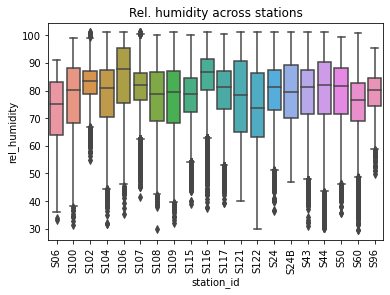

In [15]:
sns.boxplot(data = df_rh, x= "station_id", y="rel_humidity")
plt.xticks(rotation=90)
plt.title("Rel. humidity across stations")

Text(0.5, 1.0, 'Rel. humidity by month')

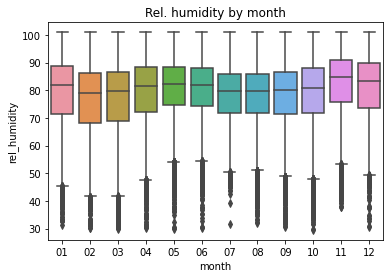

In [19]:
sns.boxplot(data = df_rh, x= "month", y="rel_humidity")
plt.title("Rel. humidity by month")

Text(0.5, 1.0, 'Rel. humidity by time')

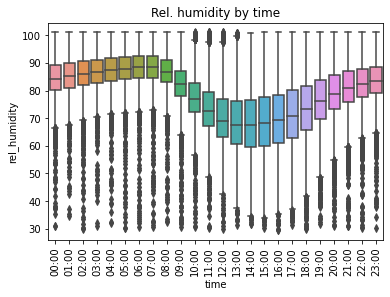

In [17]:
sns.boxplot(data = df_rh, x= "time", y="rel_humidity")
plt.xticks(rotation=90)
plt.title("Rel. humidity by time")